Importing necessary libraries for analyzing data.

In [20]:
import numpy as np  # Using pandas for data manipulation, cleansing data etc.
import pandas as pd  # Using numpy for performing numerical operations.
import matplotlib.pyplot as plt  # Using matplotlib for data visualization to get insights from the data.

Imported our dataset using pandas library and print the data

In [21]:
df = pd.read_excel('/content/E_Commerce_Dataset.xlsx')
data= pd.DataFrame(df)
print(data)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0 

Now check the information of the data and remove unrelated data from the dataset

In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Through the information we can see that our dataset containing null in few column. Either we can remove that particular row or we can replace that value from the mean of that column values. I am replacing these values from mean.

In [29]:
data['Tenure'].fillna(data['Tenure'].mean(), inplace=True)
data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].mean(), inplace=True)
data['OrderAmountHikeFromlastYear'].fillna(data['OrderAmountHikeFromlastYear'].mean(), inplace=True)
data['CouponUsed'].fillna(data['CouponUsed'].mean(), inplace=True)
data['OrderCount'].fillna(data['OrderCount'].mean(), inplace=True)
data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].mean(), inplace=True)
data['WarehouseToHome'].fillna(data['WarehouseToHome'].mean(), inplace=True)
print(data.info()) # Again Checking the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

<ipython-input-29-e316a252602c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Tenure'].fillna(data['Tenure'].mean(), inplace=True)
<ipython-input-29-e316a252602c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [79]:
print(data.head()) #looking top 5 rows of the data.

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1       4         Mobile Phone         3                6   
1       50002      1      10                Phone         1                8   
2       50003      1      10                Phone         1               30   
3       50004      1       0                Phone         3               15   
4       50005      1       0                Phone         1               12   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  ...  \
0           Debit Card  Female               3                         3  ...   
1                  UPI    Male               3                         4  ...   
2           Debit Card    Male               2                         4  ...   
3           Debit Card    Male               2                         4  ...   
4                   CC    Male               2                         3  ...   

  SatisfactionScore  MaritalStat

In [80]:
print(data.tail()) # look on the last rows of dataset

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
5625       55626      0      10             Computer         1   
5626       55627      0      13         Mobile Phone         1   
5627       55628      0       1         Mobile Phone         1   
5628       55629      0      23             Computer         3   
5629       55630      0       8         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
5625               30          Credit Card   Male               3   
5626               13          Credit Card   Male               3   
5627               11           Debit Card   Male               3   
5628                9          Credit Card   Male               4   
5629               15          Credit Card   Male               3   

      NumberOfDeviceRegistered  ... SatisfactionScore  MaritalStatus  \
5625                         2  ...                 1        Married   
5626                         5  ...         

Now we chage the datatype for our columns for analysis.

In [39]:
data['Tenure'] = data['Tenure'].astype(int)
data['HourSpendOnApp'] = data['HourSpendOnApp'].astype(int)
data['OrderAmountHikeFromlastYear'] = data['OrderAmountHikeFromlastYear'].astype(int)
data['CouponUsed'] = data['CouponUsed'].astype(int)
data['OrderCount'] = data['OrderCount'].astype(int)
data['DaySinceLastOrder'] = data['DaySinceLastOrder'].astype(int)
data['WarehouseToHome'] = data['WarehouseToHome'].astype(int)
data['CashbackAmount'] = data['CashbackAmount'].astype(int)
print(data.info()) # Again Checking the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CustomerID                   5630 non-null   int64 
 1   Churn                        5630 non-null   int64 
 2   Tenure                       5630 non-null   int64 
 3   PreferredLoginDevice         5630 non-null   object
 4   CityTier                     5630 non-null   int64 
 5   WarehouseToHome              5630 non-null   int64 
 6   PreferredPaymentMode         5630 non-null   object
 7   Gender                       5630 non-null   object
 8   HourSpendOnApp               5630 non-null   int64 
 9   NumberOfDeviceRegistered     5630 non-null   int64 
 10  PreferedOrderCat             5630 non-null   object
 11  SatisfactionScore            5630 non-null   int64 
 12  MaritalStatus                5630 non-null   object
 13  NumberOfAddress              5630

We done our replacing part. Now check for the duplicate rows in the dataset and removeing them.

In [42]:
data.duplicated() # to check the duplicate rows
data.drop_duplicates(inplace=True)
data.duplicated().sum() # Again checking the duplicate rows

np.int64(0)

Now check the churners and non-churns from the dataset.

In [49]:
data['Churn'].value_counts()

,count
Churn,
0,4682
1,948


we have 948 churners which is hug for the dataset.

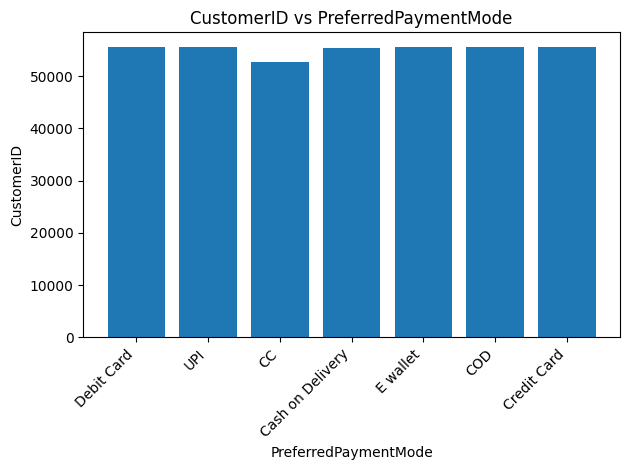

In [62]:
plt.bar(data['PreferredPaymentMode'], data['CustomerID'])
plt.title('CustomerID vs PreferredPaymentMode')
plt.xlabel('PreferredPaymentMode')
plt.ylabel('CustomerID')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed for readability
plt.tight_layout()
plt.show()

We can see that cc(Credit Card) users are lower as compared to other payment mode.

In [65]:
data['WarehouseToHome'].describe()

,WarehouseToHome
count,5630.000000
mean,15.611368
std,8.340141
min,5.000000
25%,9.000000
50%,14.000000
75%,20.000000
max,127.000000


We can see that we have customer of distance 127km from our warehouse and which can be a reason for the churn.

In [66]:
data['SatisfactionScore'].mean()

np.float64(3.066785079928952)

We have average of 3.066 which is good not perfect

In [67]:
data['Complain'].sum()

np.int64(1604)

We have 1604 customers which have complain

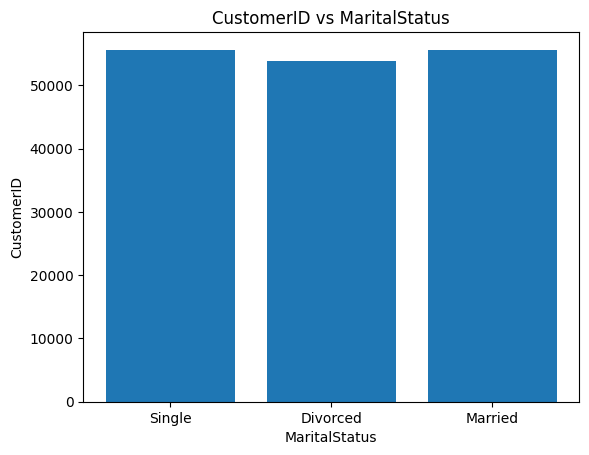

In [72]:
plt.bar(data['MaritalStatus'],data['CustomerID'])
plt.xlabel('MaritalStatus')
plt.ylabel('CustomerID')
plt.title('CustomerID vs MaritalStatus')
plt.show()

In [73]:
# Count the number of churners and non-churners by MartialStatus
print(data.groupby('MaritalStatus')['Churn'].value_counts())

MaritalStatus  Churn
Divorced       0         724
               1         124
Married        0        2642
               1         344
Single         0        1316
               1         480
Name: count, dtype: int64


Above given information where 1 stands for churners and 0 stands for non-churners.

In [74]:
# Count the number of churners and non-churners by Gender
print(data.groupby('Gender')['Churn'].value_counts())

Gender  Churn
Female  0        1898
        1         348
Male    0        2784
        1         600
Name: count, dtype: int64


In [78]:
data['cashback_per_order'] = data['CashbackAmount'] / data['OrderCount']
data['cashback_per_order'].describe()

,cashback_per_order
count,5630.000000
mean,93.405216
std,52.974047
min,0.000000
25%,57.333333
50%,83.500000
75%,128.000000
max,298.000000


We earn maximum 298 rupee per order. And average rupee is 93 per order.

### Conclusion  

The churn analysis of the e-commerce dataset highlights several key insights:  

1. **Data Cleaning & Preprocessing**  
   - Missing values were successfully handled using mean imputation.  
   - Data types were converted for efficient analysis.  
   - Duplicate records were removed to ensure data integrity.  

2. **Customer Behavior & Churn Trends**  
   - There are **948 churners**, which is a significant portion of the dataset.  
   - **Preferred Payment Mode**: Credit card users are lower compared to other payment methods.  
   - **Distance from Warehouse**: Some customers live up to **127 km away**, which may contribute to churn.  
   - **Satisfaction Score**: The average satisfaction score is **3.066**, which indicates room for improvement.  
   - **Complaints**: **1,604 customers** have filed complaints, suggesting dissatisfaction.  

3. **Demographic Insights**  
   - Marital status and gender influence churn behavior, as seen in the grouped analysis.  
   - Cashback per order varies significantly, with an average of **93 rupees per order** and a maximum of **298 rupees**.  

### Recommendations  
- Improve service for customers far from warehouses, possibly by optimizing logistics.  
- Address customer complaints to enhance satisfaction and retention.  
- Investigate and refine the benefits of different payment modes to encourage continued usage.  
